In [169]:
import FinanceDataReader as fdr
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime
import math

warnings.filterwarnings('ignore')

# Load Dataset

In [170]:
data = fdr.DataReader('005930','2017-10-18', '2022-10-18')
data.head(135)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-10-18,54820,55240,54039,54760,202215,-0.000730
2017-10-19,54699,54699,52980,52980,242174,-0.032505
2017-10-20,52800,54100,52800,53840,160541,0.016233
2017-10-23,54600,54640,54000,54300,166221,0.008544
2017-10-24,54699,54780,54040,54040,116121,-0.004788
...,...,...,...,...,...,...
2018-04-26,50420,52160,50400,52140,360931,0.034524
2018-04-27,53380,53639,52440,53000,606216,0.016494
2018-04-30,0,0,0,53000,0,0.000000


# Compute Mid Price

In [171]:
high_prices = data['High'].values
low_prices = data['Low'].values
close_prices = data['Close'].values
mid_prices = (high_prices + low_prices) / 2

for i in range(len(high_prices)):
    if high_prices[i]==0:
        mid_prices[i] = data['Close'].values[i]

for i in range(len(mid_prices)):
    mid_prices[i]=math.ceil(mid_prices[i])

# Create Windows

In [172]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [173]:
for window in result:
    for p in window:
        if p==0.0:
            print('p=0존재')
        if(window[0]== 0.0):
            print('window=0 존재')


# Normalize Data

In [174]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)


In [175]:
result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1062, 50, 1), (118, 50, 1))

# Build a Model

In [176]:
model = keras.Sequential()


In [182]:
model = Sequential()

model.add(LSTM(50, input_shape=(50, 1), return_sequences=True))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

ValueError: Shape (4, 1, 50) must have rank 0

# Training

In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Train on 1057 samples, validate on 117 samples
Epoch 1/20
1057/1057 [==============================] - 4s - loss: 0.0016 - val_loss: 0.0011
Epoch 2/20
1057/1057 [==============================] - 3s - loss: 7.0065e-04 - val_loss: 3.3145e-04
Epoch 3/20
1057/1057 [==============================] - 3s - loss: 5.2752e-04 - val_loss: 2.3981e-04
Epoch 4/20
1057/1057 [==============================] - 3s - loss: 4.1950e-04 - val_loss: 2.3031e-04
Epoch 5/20
1057/1057 [==============================] - 3s - loss: 3.4898e-04 - val_loss: 3.5865e-04
Epoch 6/20
1057/1057 [==============================] - 4s - loss: 2.8481e-04 - val_loss: 2.8153e-04
Epoch 7/20
1057/1057 [==============================] - 4s - loss: 2.5323e-04 - val_loss: 1.8462e-04
Epoch 8/20
1057/1057 [===================

# Prediction

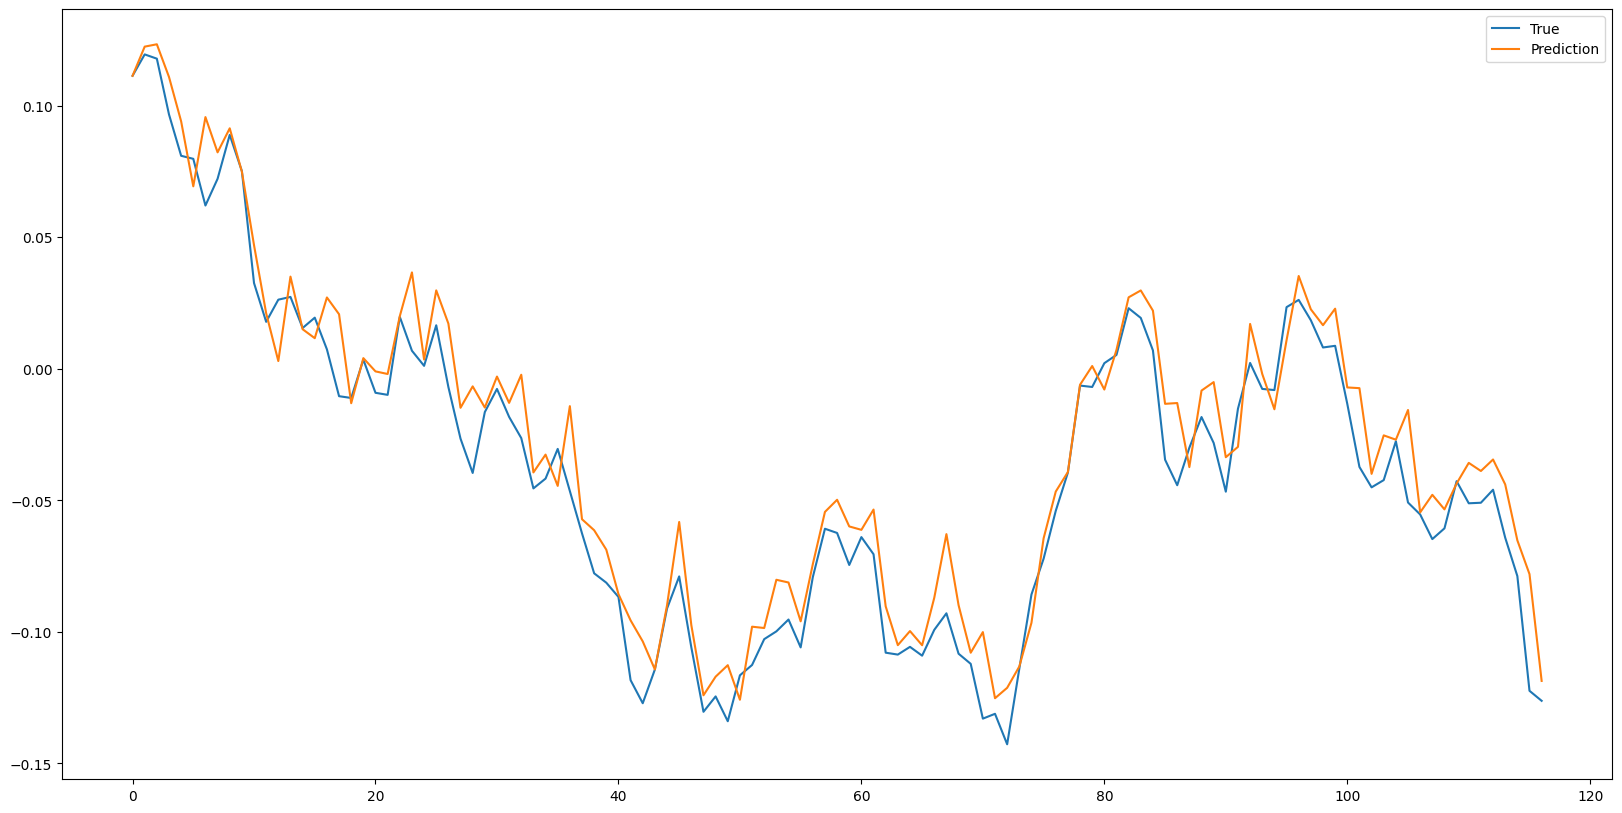

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()